In [76]:
import pandas as pd
import pytz
import numpy as np
import matplotlib.pyplot as plt

In [93]:
stations = ['East_lansing', 'Gaylord', 'GRR', 'East_Leland', 'South_Haven', 'TVC']
snow_era = []
for i in range(6):
    snow_era.append(pd.read_csv(f'./extracted/{stations[i]}/snowdepth_2001-2018_9km.csv'))

In [94]:
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='H')[:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
hour = dff.strftime('%-H')

In [95]:
for i in range(6):
    snow_era[i]['YEAR'] = year.astype(float)
    snow_era[i]['MONTH'] = mon.astype(float)
    snow_era[i]['DAY'] = day.astype(float)
    snow_era[i]['HOUR'] = hour.astype(float)

In [96]:
snwd_era = []
for i in range(6):
    snwd_era.append(snow_era[i].loc[snow_era[i]['HOUR'] == 0]['snowdepth'])
for i in range(6):
    snwd_era[i] = np.array(snwd_era[i][1:]) * 39.3701

In [107]:
fn = ['./observation/LansingSnow2000.xlsx', './observation/GaylordSnow2000.xlsx', './observation/GRRSnow2000.xlsx', 
      './observation/TravCitySnow2000.xlsx', './observation/SouthHavenSnow2000.xlsx', './observation/TravCitySnow2000.xlsx']
snwd_obs = []
for i in range(6):
    df = pd.read_excel(fn[i])
    snwd_obs.append(np.array(df.iloc[366:6940]['SNWD'].replace('M', np.nan).replace('T', 0)))

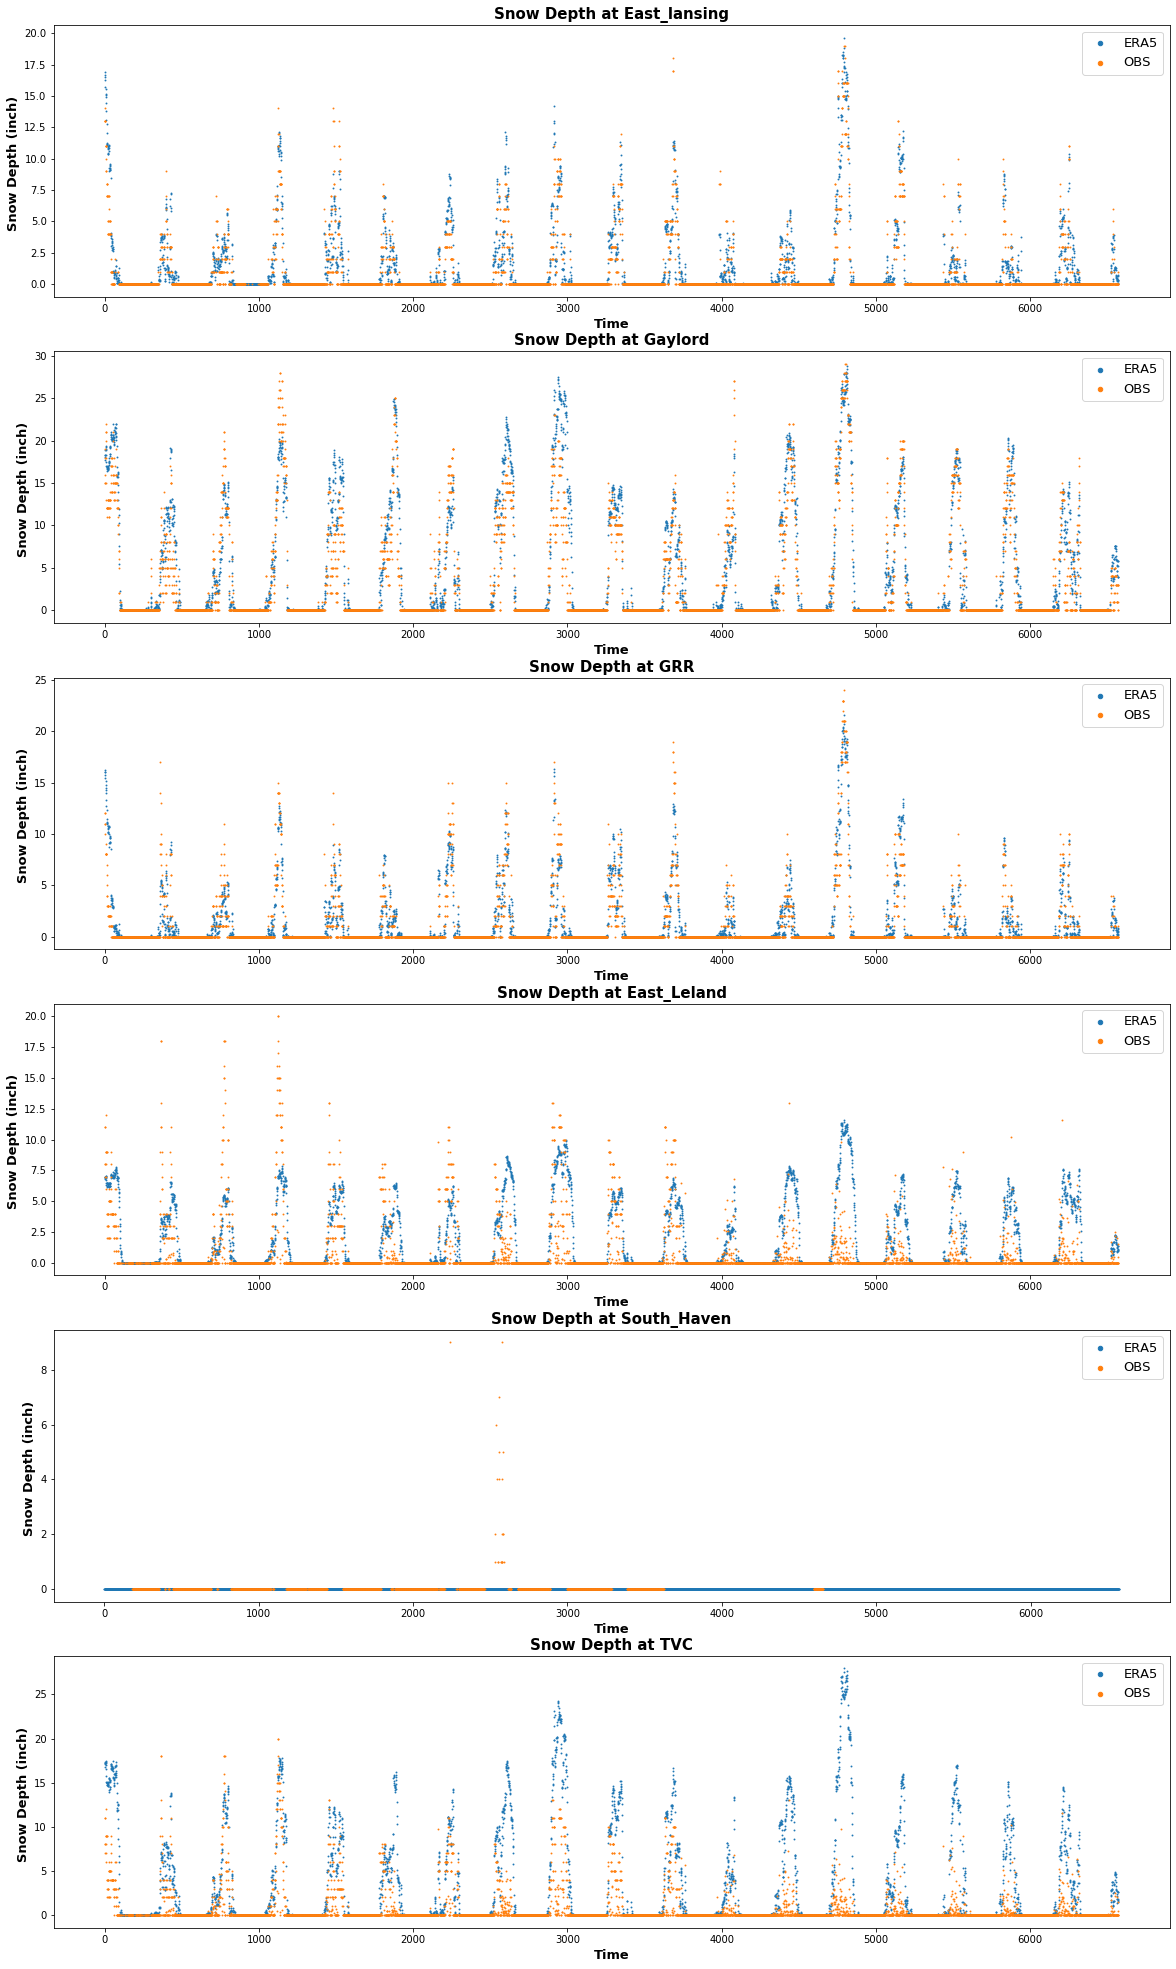

In [108]:
l = 6573
plt.subplots(6,1,figsize=(20,35))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.scatter(range(l), snwd_era[i], s=.8)
    plt.scatter(range(l), snwd_obs[i][:-1], s=.8)
    
    plt.xlabel('Time', fontweight='bold', fontsize=13)
    plt.ylabel('Snow Depth (inch) ', fontweight='bold', fontsize=13)
    plt.legend(['ERA5', 'OBS'],markerscale=5, fontsize=13)
    plt.title(f'Snow Depth at {stations[i]}', fontweight='bold', fontsize=15)
plt.savefig(f'./plot/Summary/snowdepth_timeseries.png')

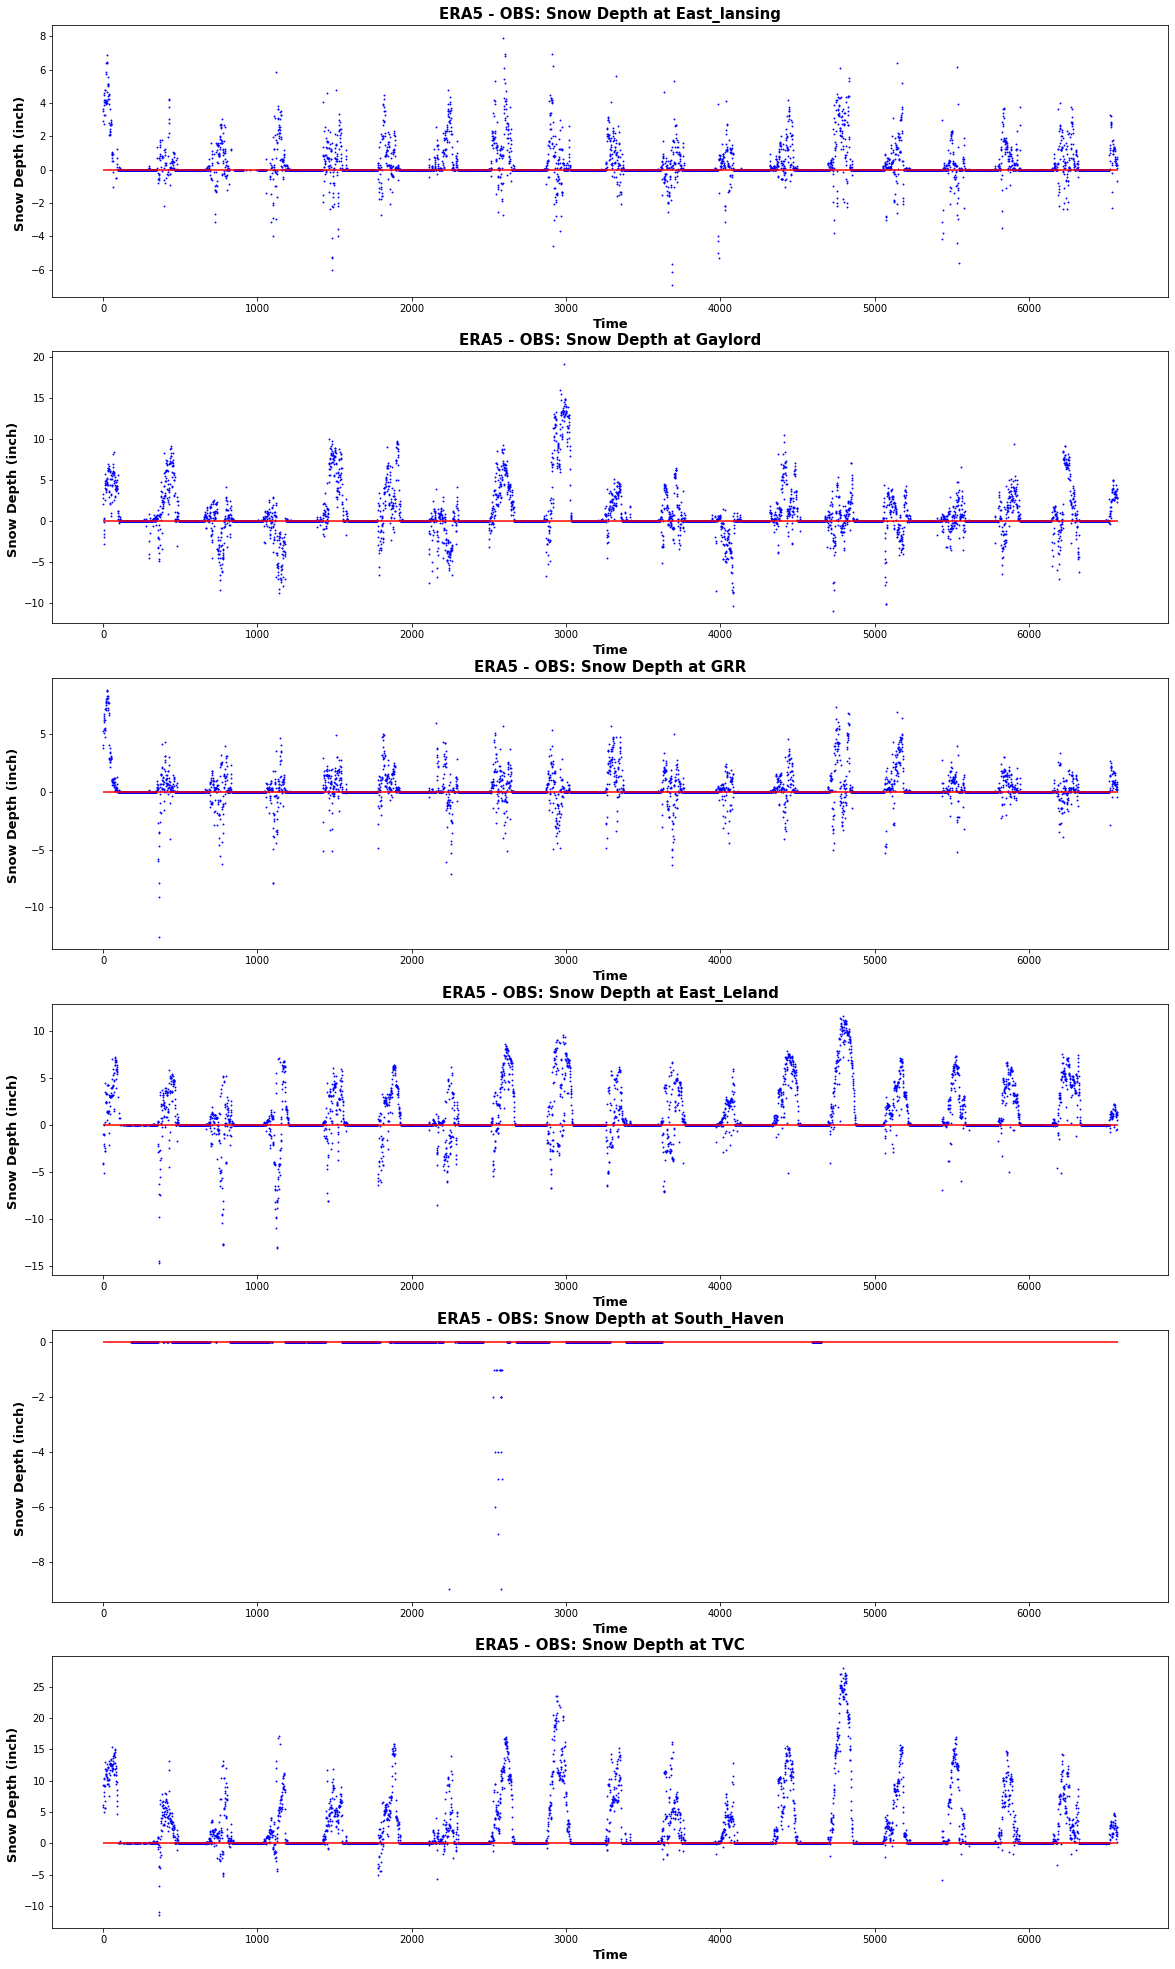

In [111]:
l = 6573
plt.subplots(6,1,figsize=(20,35))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.scatter(range(l), snwd_era[i]-snwd_obs[i][:-1], s=.8, color='b')
    plt.hlines(0, 0, 6574, 'r')
    
    plt.xlabel('Time', fontweight='bold', fontsize=13)
    plt.ylabel('Snow Depth (inch) ', fontweight='bold', fontsize=13)
    plt.title(f'ERA5 - OBS: Snow Depth at {stations[i]}', fontweight='bold', fontsize=15)
plt.savefig(f'./plot/Summary/snowdepth_timeseries_diff.png')

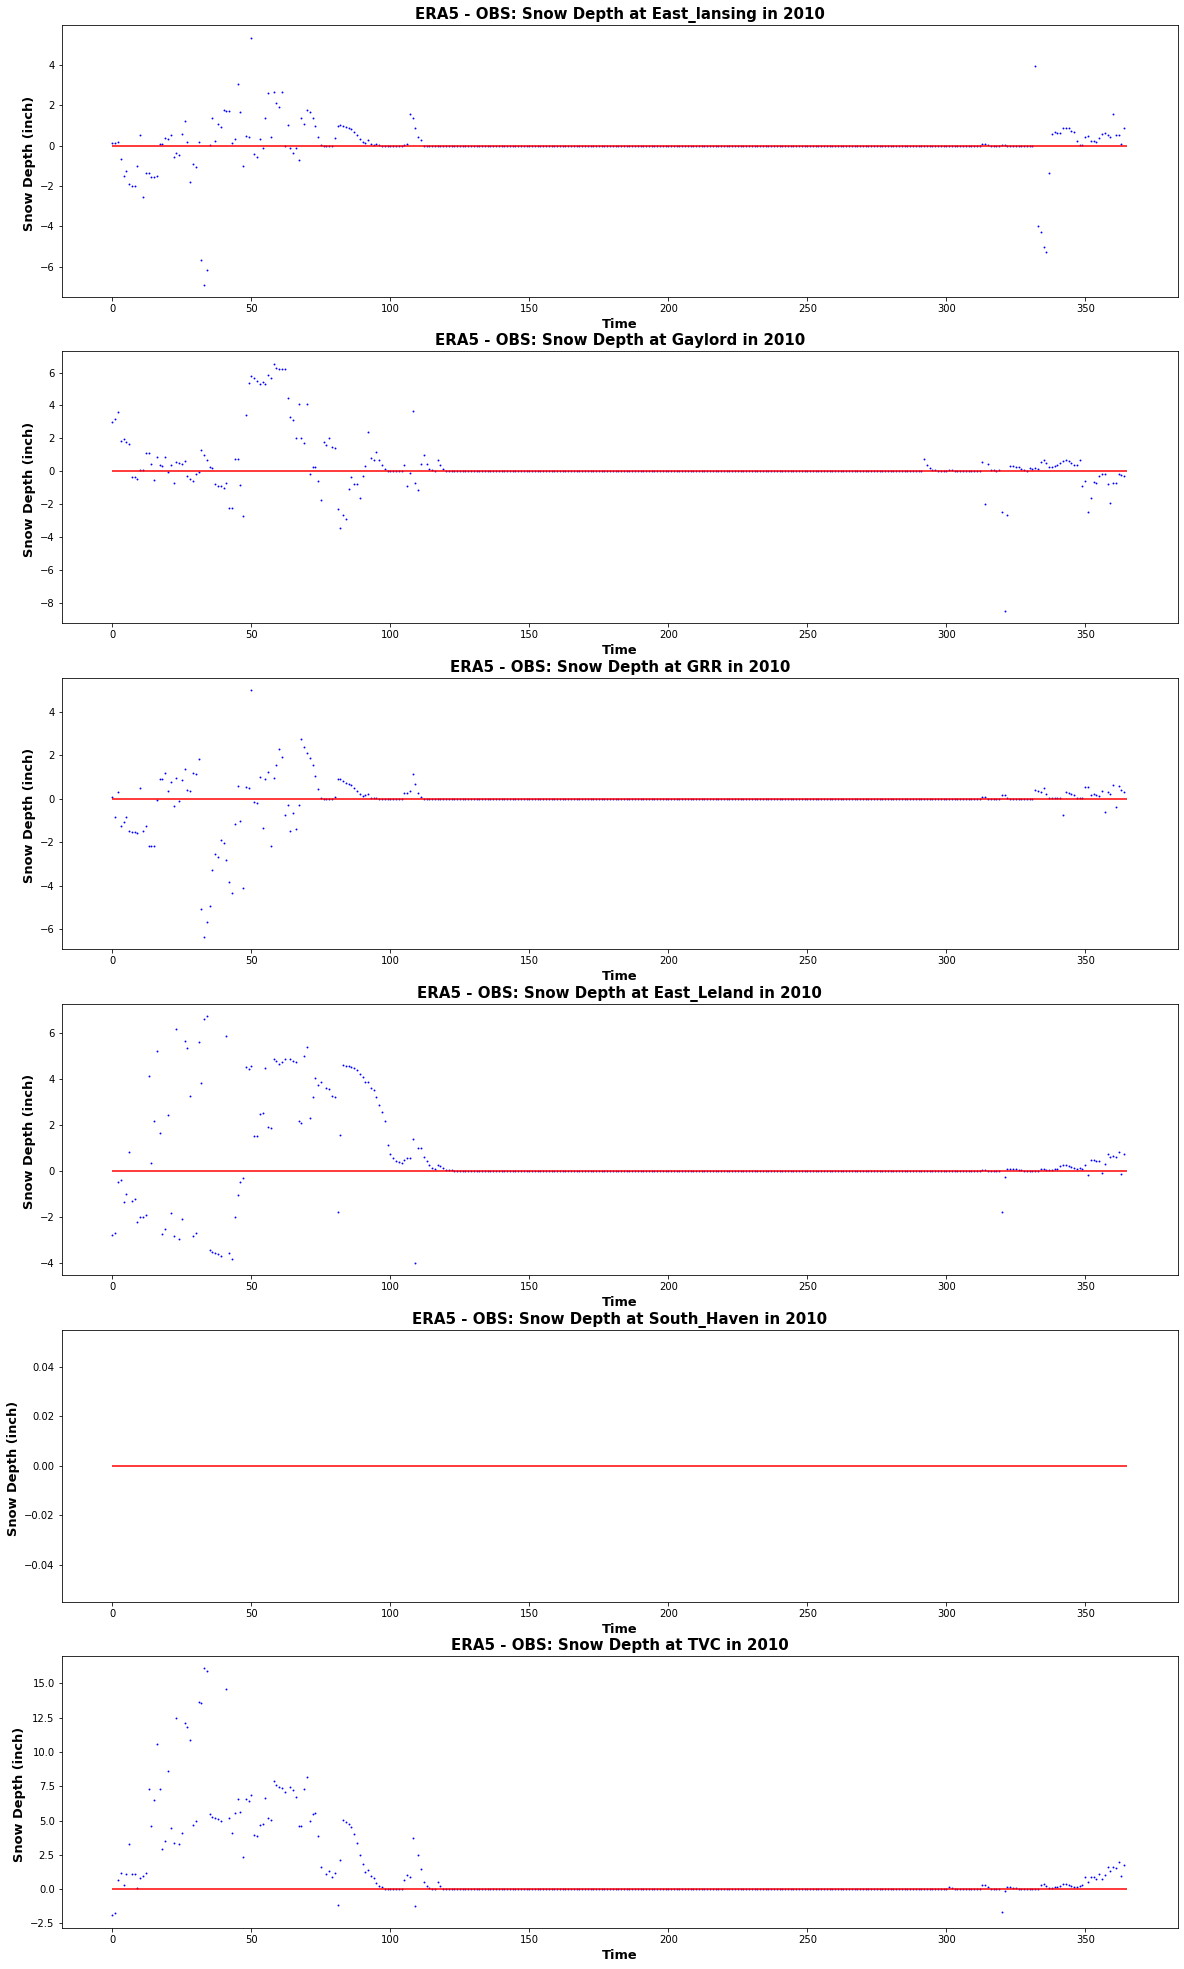

In [123]:
l = 365
plt.subplots(6,1,figsize=(20, 35))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.scatter(range(l), snwd_era[i][3652:4017]-snwd_obs[i][3652:4017], s=.8, color='b')
    plt.hlines(0, 0, l, 'r')
    
    plt.xlabel('Time', fontweight='bold', fontsize=13)
    plt.ylabel('Snow Depth (inch) ', fontweight='bold', fontsize=13)
    plt.title(f'ERA5 - OBS: Snow Depth at {stations[i]} in 2010', fontweight='bold', fontsize=15)
plt.savefig(f'./plot/Summary/snowdepth_timeseries_diff_2010.png')

In [118]:
snwd_mm = []
dff1 = pd.date_range(start='1/1/2001', end='12/30/2018', freq='D')
year1 = dff1.strftime('%Y')
mon1 = dff1.strftime('%-m')
day1 = dff1.strftime('%-d')
for i in range(6):
    mdiff = pd.DataFrame({'YEAR':year1.astype(float), 'MONTH':mon1.astype(float), 'DAY':day1.astype(float),
                          'diff':snwd_era[i]-snwd_obs[i][:-1]})
    snwd_mm.append(np.array(mdiff.groupby([mdiff.YEAR, mdiff.MONTH])['diff'].mean()))

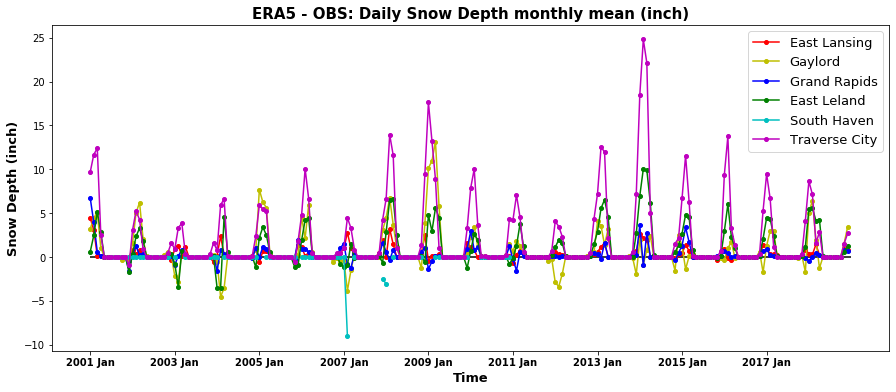

In [121]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,217)), snwd_mm[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), snwd_mm[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), snwd_mm[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), snwd_mm[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), snwd_mm[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), snwd_mm[5], 'm-o', lw=1.5, ms=4)

plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Snow Depth (inch)', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord', 'Grand Rapids', 'East Leland', 'South Haven', 'Traverse City'],fontsize = 13)
plt.title('ERA5 - OBS: Daily Snow Depth monthly mean (inch)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/snowdepth_monthlymean.png')